In [706]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j0, j1, jv, i0
from scipy.special import jn_zeros
from scipy.integrate import quad
from scipy.integrate import dblquad
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D

## Constants and math functions

In [707]:
H = 0.7 
R = 0.4 

z = np.linspace(0, H, 50)
r = np.linspace(0, R, 50)

max_k = 10
max_n = 20

In [708]:
def I0(x):
    return i0(x)

def J0(x):
    return j0(x)

def J1(x):
    return j1(x)

def J2(x):
    return jv(2, x)

def find_beta_k_roots(max_k, R=1):
    # Находим первые max_k нулей функции Бесселя первого порядка J1
    j1_zeros = jn_zeros(1, max_k)
    # Вычисляем соответствующие β_k = j1_zero / R
    roots = j1_zeros / R
    return roots

In [709]:
G = 80
LAMBDA = 120
mu_0 = (LAMBDA + G)/G
alpha = 45.0  

def a_k(k):
    return np.pi*(2 * k + 1) / 2

def lambda_n(n):
    return (np.pi * (2*n+1)) / 2 

beta_k = find_beta_k_roots(max_k, R)

## Solutions

### Function $T$ of temperature

The solution of the mathematical model of the heat conduction problem
$$
T(r, z)=\sum^\infty_0\frac{I_0(a_kr)}{I_0(a_kR)}f_ksin(a_kz)
$$
Where
$$ 
f_k=\int^H_0f(z)sin(a_kz)dz 
$$

In [710]:
def f(z):
    return -z**2+H*z

def f_k(k):
    integrand = lambda z: f(z) * np.sin(a_k(k) * z)
    integral = quad(integrand, 0, H)[0]
    return integral

In [711]:
f_k_array = np.empty(max_k)
for k in range(1, max_k+1):
    result = f_k(k)
    f_k_array[k-1] = result 

In [712]:
def T(r, z, max_k):
    sum= 0.0
    for k in range(0, max_k + 1):
        ak = a_k(k)
        sum += (f_k_array[k-1] / I0(ak * R)) * I0(ak * r) * np.sin(ak * z)
    return (2 / H) * sum

$$
T_{nk}=\int^R_0J_0(\beta_kr)rdr\int^H_0T(r,z)cos(\lambda_nz)dz \\
\lambda_n=\frac{\pi n}{2},\ \ n=0,1,... \\
\beta_kText{ - solutions of the equation: } J_0(\beta_kR)=0 
$$

In [713]:
def T_nk(n, k, T_func, max_k):
    """
    Возвращает двойной интеграл
        ∫_{r=0}^R ∫_{z=0}^H T(r,z) * J0(beta_k[k] * r) * r * cos(lambda_n(n) * z) dz dr
    """
    # Функция для dblquad: первый аргумент — z, второй — r
    def integrand(z, r):
        return T_func(r, z, max_k) * j0(beta_k[k-1]) * r * np.cos(lambda_n(n) * z)

    # dblquad ожидает порядок: dblquad(func, r_min, r_max, z_min_fun, z_max_fun)
    result, error = dblquad(integrand,
                            0,     # r от 0
                            R,     # до R
                            lambda r: 0,  # для каждого r, z от 0
                            lambda r: H)  # до H
    return result

In [714]:
T_nk_array = np.empty([max_n, max_k])
for n in range(1, max_n+1):
    for k in range(1, max_k+1):
        result = T_nk(n, k, T, max_k)
        print(n, k)
        T_nk_array[n-1, k-1] = result
print(T_nk_array)

1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9
8 10
9 1
9 2
9 3
9 4
9 5
9 6
9 7
9 8
9 9
9 10
10 1
10 2
10 3
10 4
10 5
10 6
10 7
10 8
10 9
10 10
11 1
11 2
11 3
11 4
11 5
11 6
11 7
11 8
11 9
11 10
12 1
12 2
12 3
12 4
12 5
12 6
12 7
12 8
12 9
12 10
13 1
13 2
13 3
13 4
13 5
13 6
13 7
13 8
13 9
13 10
14 1
14 2
14 3
14 4
14 5
14 6
14 7
14 8
14 9
14 10
15 1
15 2
15 3
15 4
15 5
15 6
15 7
15 8
15 9
15 10
16 1
16 2
16 3
16 4
16 5
16 6
16 7
16 8
16 9
16 10
17 1
17 2
17 3
17 4
17 5
17 6
17 7
17 8
17 9
17 10
18 1
18 2
18 3
18 4
18 5
18 6
18 7
18 8
18 9
18 10
19 1
19 2
19 3
19 4
19 5
19 6
19 7
19 8
19 9
19 10
20 1
20 2
20 3
20 4
20 5
20 6
20 7
20 8
20 9
20 10
[[-6.32369174e-05 -2.96707654e-05  4.28542112e-05  1.90881341e-05
  -3

### Functions $u(r, z)$ and $w(r, z)$

$$
u(r,z)=\frac{4\mu_0\alpha}{HR^2}
\left(\sum_{k=1}^\infty \frac{1}{\beta_k} \frac{J_1(\beta_{k}r)}{J_0^2(\beta_{k}R)}T_{0k}
+2\sum_{k=1}^{\infty}\frac{J_1(\beta_{k}r)}{J_0^2(\beta_{k}R)}
\sum_{k=1}^\infty \frac{\beta_k}{\left(\beta^2_k+\lambda^2_n\right)} 
cos(\lambda_nz)\right)T_{nk}
$$

In [715]:
def u(r, z, max_k, max_n):
    sum_u = 0.0
    for k in range(1, max_k + 1):
        sum_u += (1 / beta_k[k-1]) * J1(beta_k[k-1] * r) * J0(k * r) * T_nk_array[0, k-1]
    for n in range(1, max_n + 1):
        for k in range(1, max_k + 1):
            sum_u += 2 * (J1(beta_k[k-1] * r) / J0(beta_k[k-1] * R)**2) * (beta_k[k-1] / (beta_k[k-1]**2 + lambda_n(n)**2)) * np.cos(lambda_n(n) * z) * T_nk_array[n-1, k-1]
    return (4 * mu_0 * alpha) / (H * R**2) * sum_u

$$
w(r,z)
=-\frac{8\mu_0\alpha}{HR^2}
\sum_{k=1}^{\infty}\frac{J_0(\beta_{0k}r)}{J_0^2(\beta_{0k}R)}
\sum_{n=1}^\infty \frac{\lambda_n}{\left(\beta^2_k+\lambda^2_n\right)} sin(\lambda_nz)T_{nk}
$$

In [716]:
def w(r, z, max_k, max_n):
    sum_w = 0.0
    for k in range(1, max_k + 1):
        for n in range(1, max_n + 1):
            sum_w += np.sin(lambda_n(n) * z) * (J0(beta_k[k-1] * r) / J0(beta_k[k-1] * R)**2) * (lambda_n(n) / (beta_k[k-1]**2 + lambda_n(n)**2)) * T_nk_array[n-1, k-1]
    return (-8 * mu_0 * alpha) / (H * R**2) * sum_w

### Partial derivative's $u(r, z)$

$$
\frac{\partial u}{\partial r}(r,z)
=\frac{4\mu_0\alpha}{HR^2}
\sum_{k=1}^{\infty}\frac{J_0(\beta_{k}r)-J_2(\beta_{k}r)}{J_0^2(\beta_{k}R)}
\sum_{n=0}^\infty \frac{\beta_k}{\left(\beta^2_k+\lambda^2_n\right)} 
cos(\lambda_nz)T_{nk}
$$

In [717]:
def partial_u_r(r, z, max_k, max_n):
    sum_u_r = 0.0
    for k in range(1, max_k + 1):
        for n in range(0, max_n + 1):
            sum_u_r += (J0(beta_k[k-1] * r) - J2(beta_k[k-1] * r)) / J0(beta_k[k-1] * R)**2 * (beta_k[k-1] / (beta_k[k-1]**2 + lambda_n(n)**2)) * np.cos(lambda_n(n) * z) * T_nk_array[n-1, k-1]
    return (4 * mu_0 * alpha) / (H * R**2) * sum_u_r

$$
\frac{\partial u}{\partial z}(r,z)
=-\frac{8\mu_0\alpha}{HR^2}
\sum_{k=1}^{\infty}\frac{J_1(\beta_{k}r)}{J_0^2(\beta_{k}R)}
\sum_{n=1}^\infty \frac{\lambda_n\beta_k}{\left(\beta^2_k+\lambda^2_n\right)} sin(\lambda_nz)T_{nk}
$$

In [718]:
def partial_u_z(r, z, max_k, max_n):
    sum_u_z = 0.0
    for k in range(1, max_k + 1):
        for n in range(1, max_n + 1):
            sum_u_z += J1(beta_k[k-1] * r) / J0(beta_k[k-1] * R)**2 * (lambda_n(n) * beta_k[k-1] / (beta_k[k-1]**2 + lambda_n(n)**2)) * np.sin(lambda_n(n) * z)  * T_nk_array[n-1, k-1]
    return (-8 * mu_0 * alpha) / (H * R**2) * sum_u_z

### Partial derivative's $w(r, z)$

$$
\frac{\partial w}{\partial r}(r,z)
=\frac{8\mu_0\alpha}{HR^2}
\sum_{k=1}^{\infty}\frac{J_1(\beta_{k}r)}{J_0^2(\beta_{k}R)}
\sum_{n=1}^\infty \frac{\lambda_n}{\left(\beta^2_k+\lambda^2_n\right)} sin(\lambda_nz)T_{nk}
$$

In [719]:
def partial_w_r(r, z, max_k, max_n):
    sum_w_r = 0.0
    for k in range(1, max_k + 1):
        for n in range(1, max_n + 1):
            sum_w_r += J1(beta_k[k-1] * r) / J0(beta_k[k-1] * R)**2 * (lambda_n(n) / (beta_k[k-1]**2 + lambda_n(n)**2)) * np.sin(lambda_n(n) * z) * T_nk(n, k, T, max_k)
    return (8 * mu_0 * alpha) / (H * R**2) * sum_w_r

$$
\frac{\partial w}{\partial z}(r,z)
=-\frac{8\mu_0\alpha}{HR^2}
\sum_{k=1}^{\infty}\frac{J_0(\beta_{k}r)}{J_0^2(\beta_{k}R)}
\sum_{n=1}^\infty \frac{\lambda^2_n}{\left(\beta^2_k+\lambda^2_n\right)} cos(\lambda_nz)T_{nk}
$$

In [720]:
def partial_w_z(r, z, max_k, max_n):
    sum_w_z = 0.0
    for k in range(1, max_k + 1):
        for n in range(1, max_n + 1):
            sum_w_z += J0(beta_k[k-1] * r) / J0(beta_k[k-1] * R)**2 * (lambda_n(n)**2 / (beta_k[k-1]**2 + lambda_n(n)**2)) * np.cos(lambda_n(n) * z) * T_nk(n, k, T, max_k)
    return (-8 * mu_0 * alpha) / (H * R**2) * sum_w_z

## Plot boundary conditions

In [721]:
def plot2d(x, y, xlim, xlabel="", ylabel="", title=""):
    plt.plot(x, y)
    plt.xlim(0, xlim)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

$$w(r, 0)=0$$

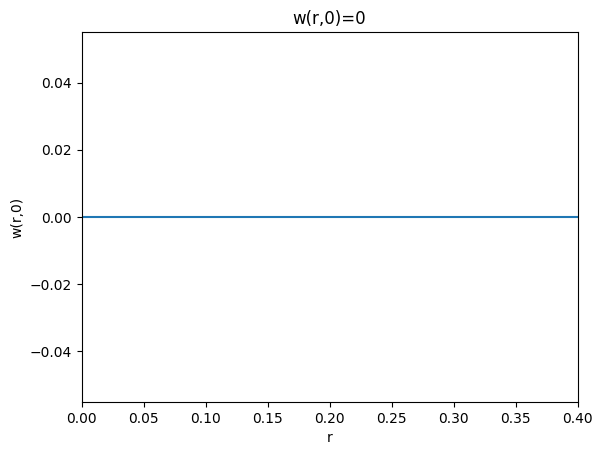

In [722]:
plot2d(r, w(r, 0, max_k, max_n), R, "r", "w(r,0)", "w(r,0)=0")

$$\frac{\partial u}{\partial z}|_{z=0}=0$$

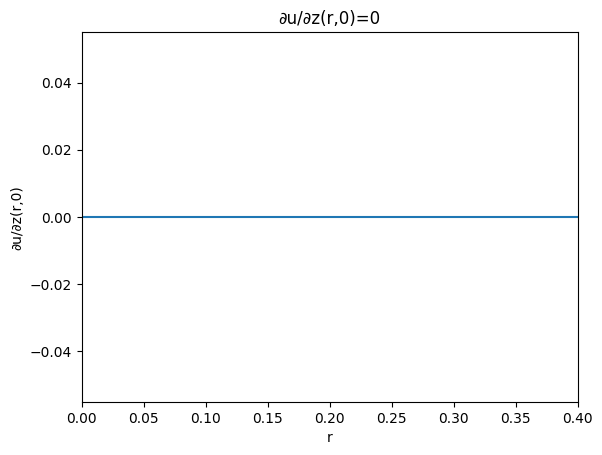

In [723]:
plot2d(r, partial_u_z(r, 0, max_k, max_n), R, "r", "∂u/∂z(r,0)", "∂u/∂z(r,0)=0")

$$w(r, H)=0$$

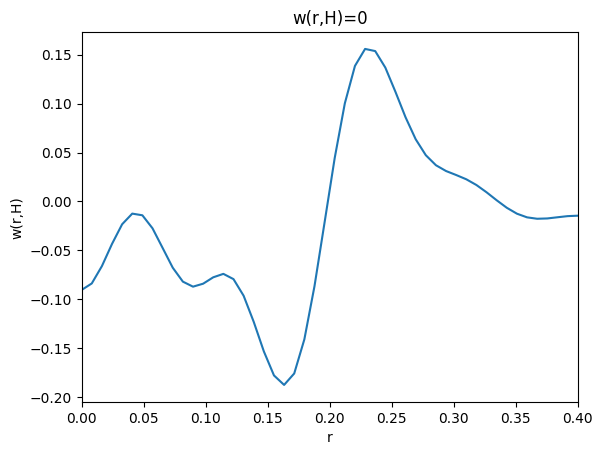

In [724]:
plot2d(r, w(r, H, max_k, max_n), R, "r", "w(r,H)", "w(r,H)=0")

$$\frac{\partial u}{\partial z}|_{z=H}=0$$

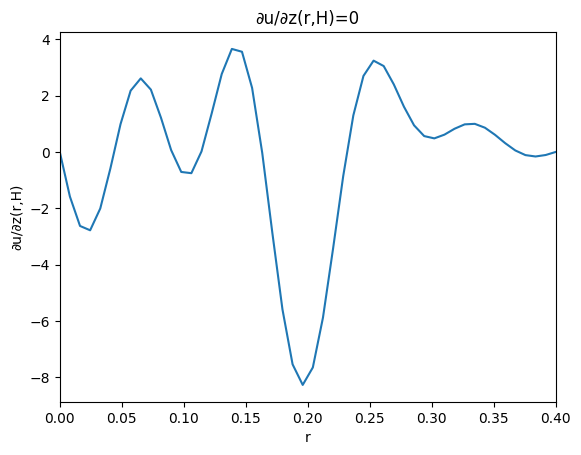

In [725]:
plot2d(r, partial_u_z(r, H, max_k, max_n), R, "r", "∂u/∂z(r,H)", "∂u/∂z(r,H)=0")

$$u(R, z)=0$$

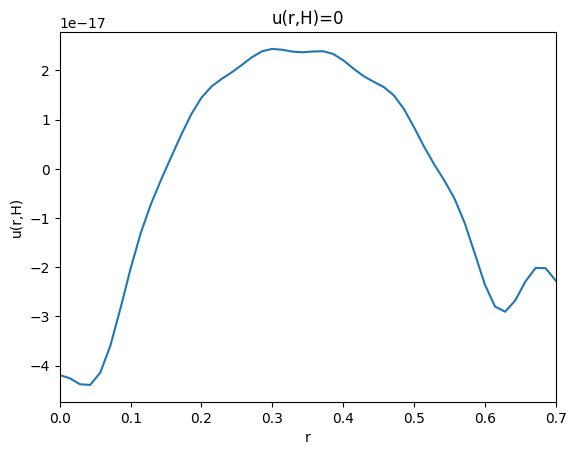

In [726]:
plot2d(z, u(R, z, max_k, max_n), H, "r", "u(r,H)", "u(r,H)=0")

$$\frac{\partial w}{\partial r}|_{r=R}=0$$

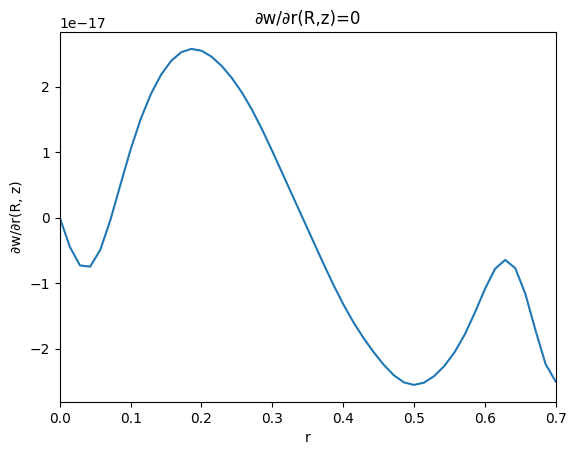

In [727]:
plot2d(z, partial_w_r(R, z, max_k, max_n), H, "r", "∂w/∂r(R, z)", "∂w/∂r(R,z)=0")

## Plot solutions

In [728]:
def plot3d(r, z, f, rlabel='r', zlabel='z', flabel='', title=''):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlim(0, R)
    ax.set_ylim(0, H)
    
    r3d, z3d = np.meshgrid(r, z)
    
    print(np.max(f(r3d, z3d, max_k, max_n)))

    ax.plot_surface(r3d, z3d, f(r3d, z3d, max_k, max_n), cmap='viridis')

    ax.set_title(title)
    ax.set_xlabel(rlabel)
    ax.set_ylabel(zlabel)
    ax.set_zlabel(flabel)

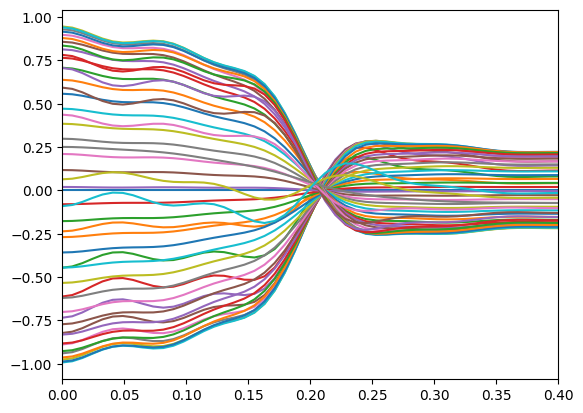

In [729]:
for i in z:
    plot2d(r, w(r, i, max_k, max_n), R)

0.9455744488402538


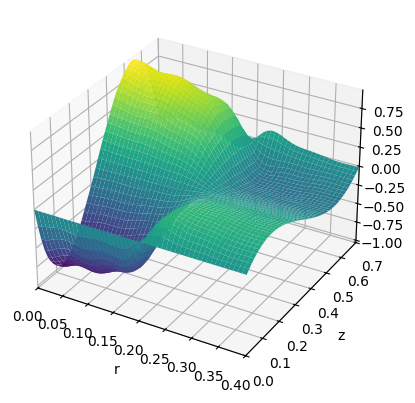

In [730]:
plot3d(r, z, w)

0.8856900218767882


KeyboardInterrupt: 

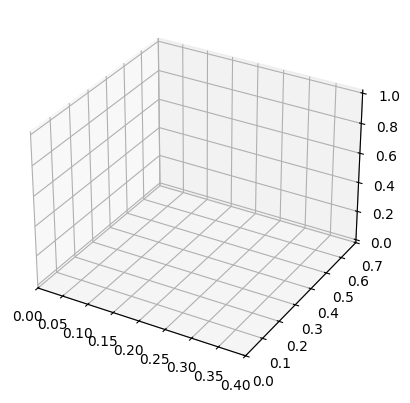

In [731]:
plot3d(r, z, partial_w_r)

18.75506125174067


KeyboardInterrupt: 

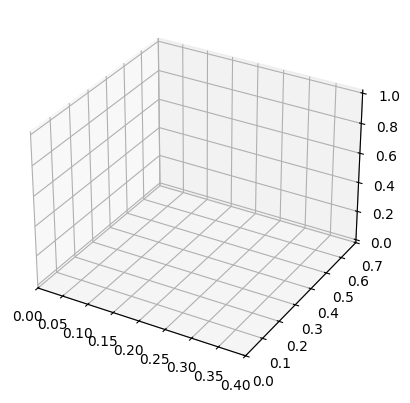

In [ ]:
plot3d(r, z, partial_w_z)

1.985378234935006


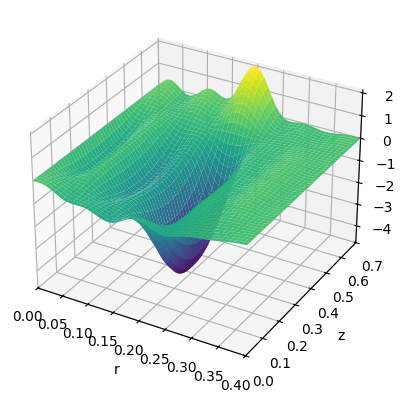

In [ ]:
plot3d(r, z, u)

2.8667062292514016


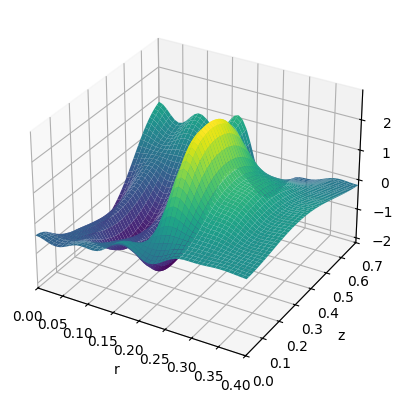

In [ ]:
plot3d(r, z, partial_u_r)

29.439152716282052


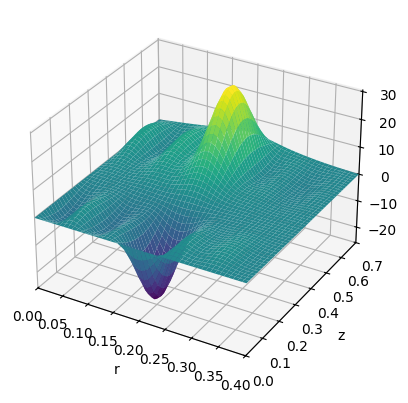

In [ ]:
plot3d(r, z, partial_u_z)

## Cylinder's visualization

In [ ]:
def draw_cylinder(colors=['red', 'blue', 'blue'] ,radius=1, height=2, resolution=30):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Генерация координат для боковой поверхности
    theta = np.linspace(0, 2 * np.pi, resolution)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    z_bottom = np.zeros_like(x)
    z_top = np.ones_like(x) * height
    
    # Рисуем боковую поверхность
    for i in range(len(x) - 1):
        verts = [[(x[i], y[i], z_bottom[i]),
                  (x[i+1], y[i+1], z_bottom[i+1]),
                  (x[i+1], y[i+1], z_top[i+1]),
                  (x[i], y[i], z_top[i])]]
        ax.add_collection3d(Poly3DCollection(verts, color=colors[0], edgecolor='k'))
    
    # Рисуем верхнюю и нижнюю крышки
    ax.add_collection3d(Poly3DCollection([list(zip(x, y, z_bottom))], color=colors[1], edgecolor='k'))
    ax.add_collection3d(Poly3DCollection([list(zip(x, y, z_top))], color=colors[2], edgecolor='k'))
    
    # Настройки осей
    ax.set_xlim([-radius, radius])
    ax.set_ylim([-radius, radius])
    ax.set_zlim([0, height])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_box_aspect([1, 1, height / radius])
    
    plt.show()

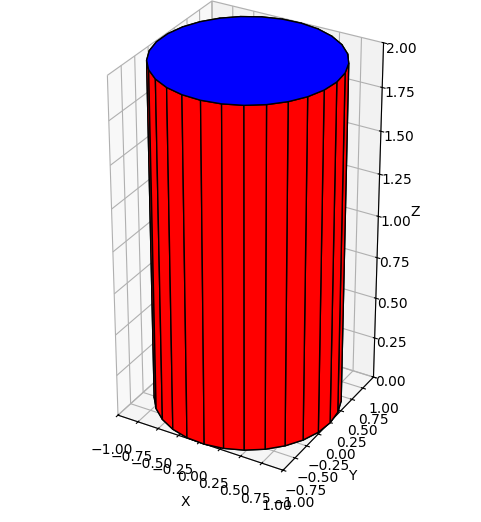

In [ ]:
draw_cylinder()

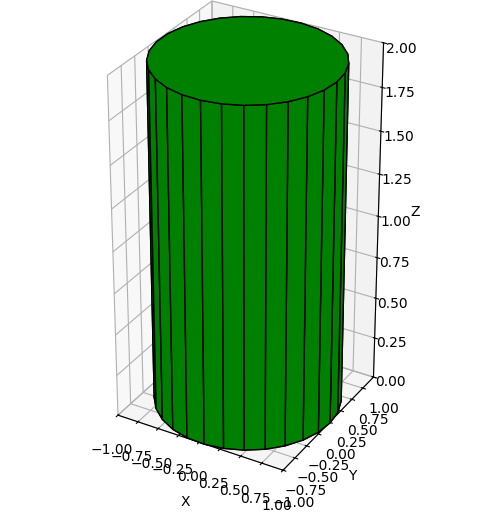

In [ ]:
draw_cylinder(['green', 'green', 'green'])

In [ ]:
def draw_pol_cylinder(outer_radius=1, inner_radius=0.7, height=2, resolution=30):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    
    # Генерация координат для внешней и внутренней боковых поверхностей
    theta = np.linspace(0, 2 * np.pi, resolution)
    outer_x = outer_radius * np.cos(theta)
    outer_y = outer_radius * np.sin(theta)
    inner_x = inner_radius * np.cos(theta)
    inner_y = inner_radius * np.sin(theta)
    z_bottom = np.zeros_like(outer_x)
    z_top = np.ones_like(outer_x) * height
    
    # Рисуем внешнюю боковую поверхность
    for i in range(len(outer_x) - 1):
        verts = [[(outer_x[i], outer_y[i], z_bottom[i]),
                  (outer_x[i+1], outer_y[i+1], z_bottom[i+1]),
                  (outer_x[i+1], outer_y[i+1], z_top[i+1]),
                  (outer_x[i], outer_y[i], z_top[i])]]
        ax.add_collection3d(Poly3DCollection(verts, color='green', edgecolor='k'))
    
    # Рисуем внутреннюю боковую поверхность
    for i in range(len(inner_x) - 1):
        verts = [[(inner_x[i], inner_y[i], z_bottom[i]),
                  (inner_x[i+1], inner_y[i+1], z_bottom[i+1]),
                  (inner_x[i+1], inner_y[i+1], z_top[i+1]),
                  (inner_x[i], inner_y[i], z_top[i])]]
        ax.add_collection3d(Poly3DCollection(verts, color='green', edgecolor='k'))
    
    # Рисуем верхнюю и нижнюю крышки как кольца
    ax.add_collection3d(Poly3DCollection([list(zip(outer_x, outer_y, z_bottom)) + list(zip(inner_x[::-1], inner_y[::-1], z_bottom))], color='green', edgecolor='k'))
    ax.add_collection3d(Poly3DCollection([list(zip(outer_x, outer_y, z_top)) + list(zip(inner_x[::-1], inner_y[::-1], z_top))], color='green', edgecolor='k'))
    
    # Настройки осей
    ax.set_xlim([-outer_radius, outer_radius])
    ax.set_ylim([-outer_radius, outer_radius])
    ax.set_zlim([0, height])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_box_aspect([1, 1, height / outer_radius])
    
    plt.show()


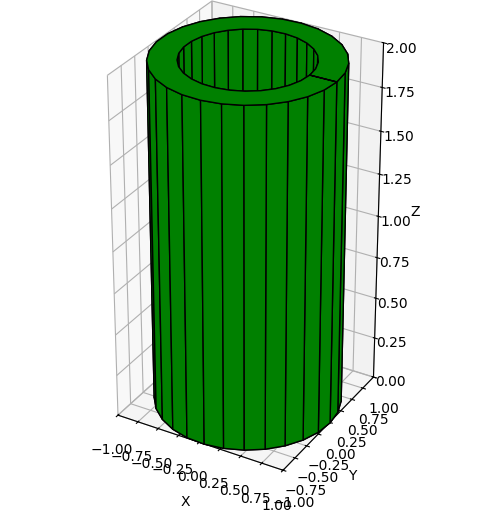

In [ ]:
draw_pol_cylinder()